# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import json
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

## Generate Cities List

In [13]:
#generating a random list of cities 
#range of latitues to use -90 to 90 and range of longitutes to use -180 to 180

#creating a random list of LATS and LONGs, setting size high in case of duplicate cities, increasing more due to not finding all city info in api call
lat_list = np.random.randint(-90,90,size=1600)
lng_list = np.random.randint(-180,180,size=1600)

cities_list = []

#looping through the list to get cities using citipy
for i in range(len(lat_list)):
    found_city = citipy.nearest_city(lat_list[i], lng_list[i]).city_name
    
    #I know we are generating random numbers but doublecheking not to get dups
    if found_city not in cities_list:
        cities_list.append(found_city)

len(cities_list)

671

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Build query URL
query_url = url + "appid=" + weather_api_key +"&units=" + units 

# DF to hold city info
city_data = {"City Name": [],"Lat": [],"Lng": [],"Max Temp": [],"Humidity": [],"Cloudiness": [],
              "Wind Speed": [],"Country": [],"Date": []}

#looping through the cities to get info based on city_list
print("Beginning Data Retrieval")
print(30*"-")

for i in range(len(cities_list)):
    city = requests.get(query_url+ "&q=" + cities_list[i]).json()
    try:
        print(f"Processing Record {i} of {len(cities_list)}| {cities_list[i]}")
        city_data["City Name"].append(city["name"])
        city_data["Lat"].append(city["coord"]["lat"])
        city_data["Lng"].append(city["coord"]["lon"])
        city_data["Max Temp"].append(city["main"]["temp_max"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
    
    except KeyError:
        print(f"{cities_list[i]} not found. Skipping...")
        continue

print(30*"-")        
print("Data Retrieval Complete.")
print(30*"-")
print(f"Found information for {len(city_data['City Name'])} cities.")






Beginning Data Retrieval
------------------------------
Processing Record 0 of 671| new plymouth
Processing Record 1 of 671| kapaa
Processing Record 2 of 671| atuona
Processing Record 3 of 671| emporia
Processing Record 4 of 671| mys shmidta
mys shmidta not found. Skipping...
Processing Record 5 of 671| fallon
Processing Record 6 of 671| punta arenas
Processing Record 7 of 671| miranorte
miranorte not found. Skipping...
Processing Record 8 of 671| avarua
Processing Record 9 of 671| jamestown
Processing Record 10 of 671| illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 11 of 671| moose factory
Processing Record 12 of 671| albany
Processing Record 13 of 671| cidreira
Processing Record 14 of 671| onega
Processing Record 15 of 671| igarka
Processing Record 16 of 671| hobart
Processing Record 17 of 671| mataura
Processing Record 18 of 671| gao
Processing Record 19 of 671| narsaq
Processing Record 20 of 671| manggar
Processing Record 21 of 671| havelock
Processing R

Processing Record 192 of 671| igrim
Processing Record 193 of 671| laurel
Processing Record 194 of 671| yulara
Processing Record 195 of 671| miandrivazo
Processing Record 196 of 671| hami
Processing Record 197 of 671| coahuayana
Processing Record 198 of 671| avinurme
Processing Record 199 of 671| katherine
Processing Record 200 of 671| toribio
Processing Record 201 of 671| algiers
Processing Record 202 of 671| faya
Processing Record 203 of 671| barbar
barbar not found. Skipping...
Processing Record 204 of 671| farah
Processing Record 205 of 671| troitskiy
Processing Record 206 of 671| tual
Processing Record 207 of 671| kavaratti
Processing Record 208 of 671| marquette
Processing Record 209 of 671| sao paulo de olivenca
Processing Record 210 of 671| san isidro
Processing Record 211 of 671| severo-kurilsk
Processing Record 212 of 671| kodinsk
Processing Record 213 of 671| lebu
Processing Record 214 of 671| bonavista
Processing Record 215 of 671| colinas
Processing Record 216 of 671| santa

Processing Record 392 of 671| wenling
Processing Record 393 of 671| loanda
Processing Record 394 of 671| san quintin
Processing Record 395 of 671| giyani
Processing Record 396 of 671| mahadday weyne
mahadday weyne not found. Skipping...
Processing Record 397 of 671| bachaquero
Processing Record 398 of 671| avera
Processing Record 399 of 671| lorengau
Processing Record 400 of 671| horasan
Processing Record 401 of 671| puqi
Processing Record 402 of 671| stepnyak
Processing Record 403 of 671| ayan
Processing Record 404 of 671| knysna
Processing Record 405 of 671| mugur-aksy
Processing Record 406 of 671| xining
Processing Record 407 of 671| maneadero
Processing Record 408 of 671| mizdah
Processing Record 409 of 671| sidi ali
Processing Record 410 of 671| ust-nera
Processing Record 411 of 671| zverinogolovskoye
Processing Record 412 of 671| linhares
Processing Record 413 of 671| sukhothai
Processing Record 414 of 671| marcona
marcona not found. Skipping...
Processing Record 415 of 671| mary

Processing Record 587 of 671| storsteinnes
Processing Record 588 of 671| louisbourg
louisbourg not found. Skipping...
Processing Record 589 of 671| taoudenni
Processing Record 590 of 671| kushiro
Processing Record 591 of 671| abu samrah
Processing Record 592 of 671| hailar
Processing Record 593 of 671| maceio
Processing Record 594 of 671| kurara
Processing Record 595 of 671| leningradskiy
Processing Record 596 of 671| sechura
Processing Record 597 of 671| hengyang
Processing Record 598 of 671| munster
Processing Record 599 of 671| canutama
Processing Record 600 of 671| scottsboro
Processing Record 601 of 671| hovd
Processing Record 602 of 671| hambantota
Processing Record 603 of 671| abu jubayhah
abu jubayhah not found. Skipping...
Processing Record 604 of 671| omboue
Processing Record 605 of 671| nueva imperial
Processing Record 606 of 671| hayesville
Processing Record 607 of 671| ipixuna
Processing Record 608 of 671| chara
Processing Record 609 of 671| ouallam
Processing Record 610 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#taking the data from the city_data dict to DF
city_df = pd.DataFrame.from_dict(city_data)

#exporting to a csv file
city_df.to_csv("output_data/city_data.csv")


city_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Plymouth,-39.07,174.08,57.00,68,12,15.01,NZ,1600234364
1,Kapaa,22.08,-159.32,80.60,69,20,10.29,US,1600233949
2,Atuona,-9.80,-139.03,78.33,76,1,18.63,PF,1600234364
3,Emporia,38.40,-96.18,62.60,88,1,6.93,US,1600234365
4,Fallon,39.47,-118.78,60.80,44,90,5.82,US,1600234365


In [26]:
#creating summary table below
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,6.200000e+02
mean,21.122226,15.585129,66.427694,71.579032,53.988710,7.884371,1.600234e+09
std,32.786359,90.187469,15.355674,20.881508,36.847828,5.341725,1.489161e+02
min,-54.800000,-175.200000,18.480000,10.000000,0.000000,0.200000,1.600234e+09
25%,-5.700000,-63.087500,54.000000,59.000000,20.000000,3.830000,1.600234e+09
50%,24.215000,20.030000,68.890000,77.000000,62.000000,6.910000,1.600234e+09
75%,48.917500,91.807500,77.297500,88.000000,90.000000,10.745000,1.600234e+09
max,78.220000,178.420000,101.970000,100.000000,100.000000,34.450000,1.600235e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#searching for cities that have humidity > 100%
hum_check = city_df['Humidity'].loc[city_df['Humidity'] > 100]
#how many are there?
len(hum_check)

0

In [32]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,6.200000e+02
mean,21.122226,15.585129,66.427694,71.579032,53.988710,7.884371,1.600234e+09
std,32.786359,90.187469,15.355674,20.881508,36.847828,5.341725,1.489161e+02
min,-54.800000,-175.200000,18.480000,10.000000,0.000000,0.200000,1.600234e+09
25%,-5.700000,-63.087500,54.000000,59.000000,20.000000,3.830000,1.600234e+09
50%,24.215000,20.030000,68.890000,77.000000,62.000000,6.910000,1.600234e+09
75%,48.917500,91.807500,77.297500,88.000000,90.000000,10.745000,1.600234e+09
max,78.220000,178.420000,101.970000,100.000000,100.000000,34.450000,1.600235e+09


In [30]:
#double verifying that the Humidity index doesnt exceed 100
city_df.sort_values(by='Humidity', ascending=False)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
94,Laas,46.62,10.70,57.00,100,20,3.36,IT,1600234031
156,Nybro,56.74,15.91,57.00,100,10,1.12,SE,1600234399
292,Eura,61.13,22.13,53.60,100,90,8.05,FI,1600234435
542,Storsteinnes,69.24,19.23,46.40,100,75,8.05,NO,1600234511
307,Kotka,60.47,26.95,54.00,100,40,9.17,FI,1600234439
...,...,...,...,...,...,...,...,...,...
202,Yumen,40.28,97.20,74.95,15,95,20.02,CN,1600234412
81,Tessalit,20.20,1.01,89.65,15,82,11.03,ML,1600234061
506,Barstow,34.90,-117.02,82.40,14,1,9.17,US,1600234498
102,Saint George,37.10,-113.58,84.20,12,1,3.04,US,1600234385


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

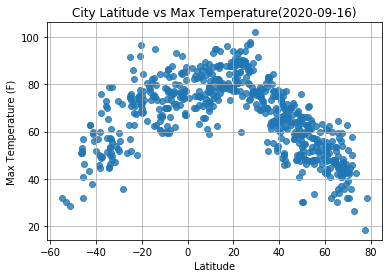

In [41]:
#getting date to put in title
cur_date = pd.to_datetime(city_df['Date'], unit='s')
plt.scatter(city_df['Lat'],city_df['Max Temp'], alpha=0.8)

#labels
plt.title(f'City Latitude vs Max Temperature({str(cur_date[0])[:-9]})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

#saving image 
plt.savefig('Images/Lat_vs_Max_Temp.png')

plt.show()

Observation: Latitutes are the horizontal lines that go across the world.What we are observing in the graph above is that the closer we are to the 0 (where the equator is), the higher the temperature gets. This graph is analysing the relationship of the highest temperature and where the city is located latitude wise. Interesting to note is that the temp is higher or tends to peak slightly at the 20 Latitude line. Is this maybe because this is around where the sahara dessert and other extremely dry climates are located, thats why there is a peak in temperature?

## Latitude vs. Humidity Plot

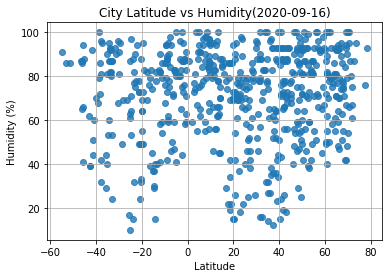

In [42]:
#plotting the data
plt.scatter(city_df['Lat'],city_df['Humidity'], alpha=0.8)

#labels
plt.title(f'City Latitude vs Humidity({str(cur_date[0])[:-9]})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

#saving image 
plt.savefig('Images/Lat_vs_Humidity.png')

plt.show()

Observation: In the graph above we are analysing the relationship between a City's Latitute and Humidity. At first glance, I dont see any clear relationship between latitue and Humidity, however, I do see that the Higher the Humidity percentage is, it tends to be around the positive side of the Latitude. It would be intersting if there to further investigate Humidity with Longitude 

## Latitude vs. Cloudiness Plot

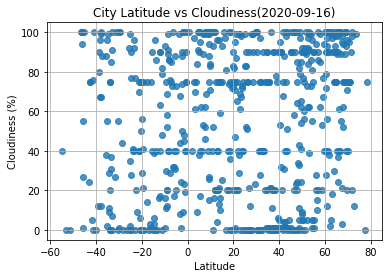

In [43]:
#plotting the data
plt.scatter(city_df['Lat'],city_df['Cloudiness'], alpha=0.8)

#labels
plt.title(f'City Latitude vs Cloudiness({str(cur_date[0])[:-9]})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

#saving image 
plt.savefig('Images/Lat_vs_Cloudiness.png')

plt.show()

Observation: In the graph above we are analysing the relationship between a City's Latitute and Cloudiness. At first glance, I dont see any clear relationship between Latitue and Cloudiness.

## Latitude vs. Wind Speed Plot

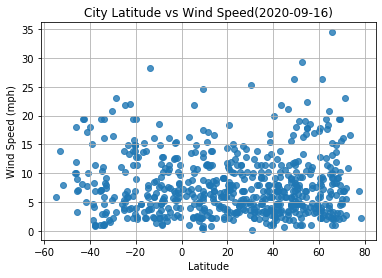

In [44]:
#plotting the data
plt.scatter(city_df['Lat'],city_df['Wind Speed'], alpha=0.8)

#labels
plt.title(f'City Latitude vs Wind Speed({str(cur_date[0])[:-9]})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

#saving image 
plt.savefig('Images/Lat_vs_Wind_Speed.png')

plt.show()

In [ ]:
Observation

## Linear Regression

In [55]:
#creating different df for north and south latitudes
north_hem = city_df[city_df['Lat'] > 0]
south_hem = city_df[city_df['Lat'] < 0]

north_hem.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.08,-159.32,80.60,69,20,10.29,US,1600233949
3,Emporia,38.40,-96.18,62.60,88,1,6.93,US,1600234365
4,Fallon,39.47,-118.78,60.80,44,90,5.82,US,1600234365
7,Jamestown,42.10,-79.24,51.01,87,1,8.05,US,1600234366
8,Moose Factory,51.26,-80.61,48.20,87,90,4.70,CA,1600234366


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6606103179023508


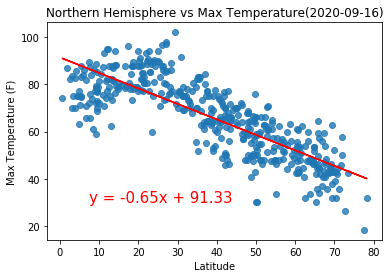

In [57]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Max Temp'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hem['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plotting
plt.scatter(north_hem['Lat'],north_hem['Max Temp'], alpha=0.8)

# Plot the regression line
plt.plot(north_hem['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

#labels
plt.title(f'Northern Hemisphere vs Max Temperature({str(cur_date[0])[:-9]})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
#saving image 
plt.savefig('Images/North_Hem_vs_Max_Temp.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4744703692993659


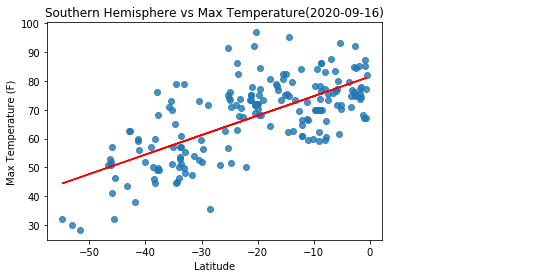

In [58]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Max Temp'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hem['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plotting
plt.scatter(south_hem['Lat'],south_hem['Max Temp'], alpha=0.8)

# Plot the regression line
plt.plot(south_hem['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

#labels
plt.title(f'Southern Hemisphere vs Max Temperature({str(cur_date[0])[:-9]})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
#saving image 
plt.savefig('Images/South_Hem_vs_Max_Temp.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001821757496695789


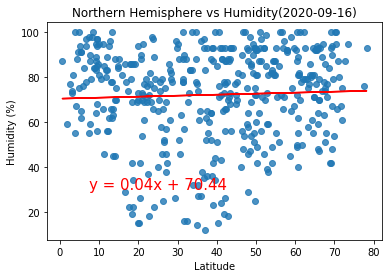

In [59]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Humidity'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hem['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plotting
plt.scatter(north_hem['Lat'],north_hem['Humidity'], alpha=0.8)

# Plot the regression line
plt.plot(north_hem['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

#labels
plt.title(f'Northern Hemisphere vs Humidity({str(cur_date[0])[:-9]})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
#saving image 
plt.savefig('Images/North_Hem_vs_Humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001243633369596885


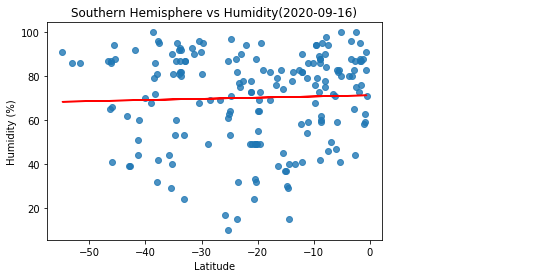

In [60]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Humidity'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hem['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plotting
plt.scatter(south_hem['Lat'],south_hem['Humidity'], alpha=0.8)

# Plot the regression line
plt.plot(south_hem['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

#labels
plt.title(f'Southern Hemisphere vs Humidity({str(cur_date[0])[:-9]})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
#saving image 
plt.savefig('Images/South_Hem_vs_Humidity.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


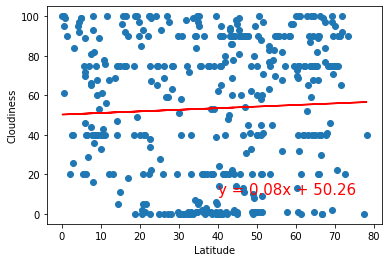

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


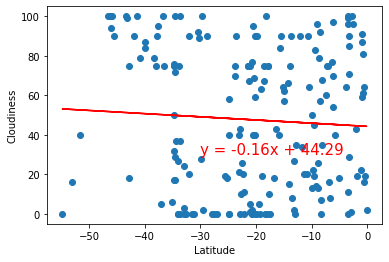

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


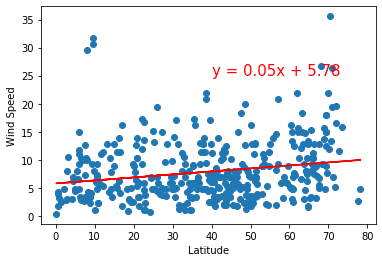

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


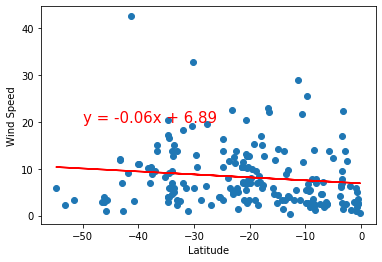